# Money Ball

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [89]:
df=pd.read_csv('baseball.csv')

In [90]:
df.shape

(1232, 15)

In [91]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [92]:
df.loc[:,'RD']=df.RS-df.RA
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [93]:
moneyball = df.loc[df["Year"]<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


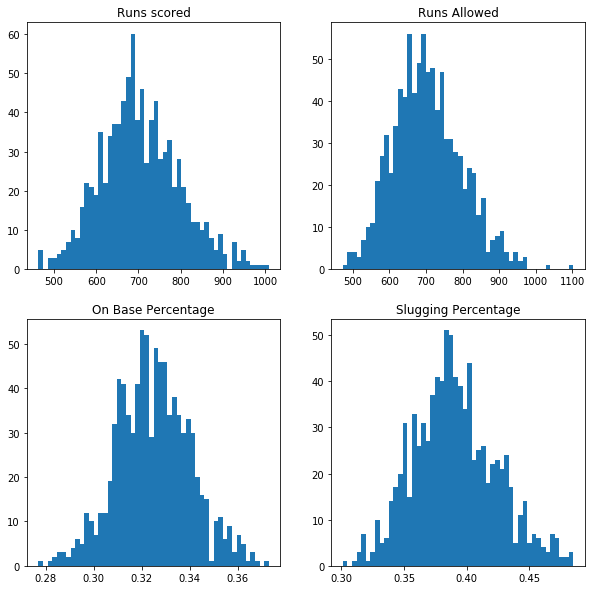

In [94]:
f,ax=plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins=50)
ax[0,0].set_title("Runs scored")
ax[0,1].hist(moneyball.RA,bins=50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins=50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins=50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

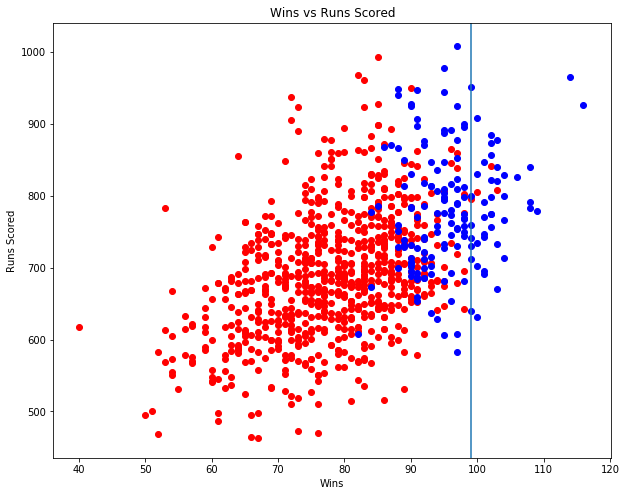

In [95]:
moneyball1=moneyball.loc[moneyball['Playoffs']==1]
moneyball0=moneyball.loc[moneyball['Playoffs']==0]
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y=moneyball0.RS,c="red")
plt.scatter(x=moneyball1.W,y=moneyball1.RS,c="blue")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x=99)

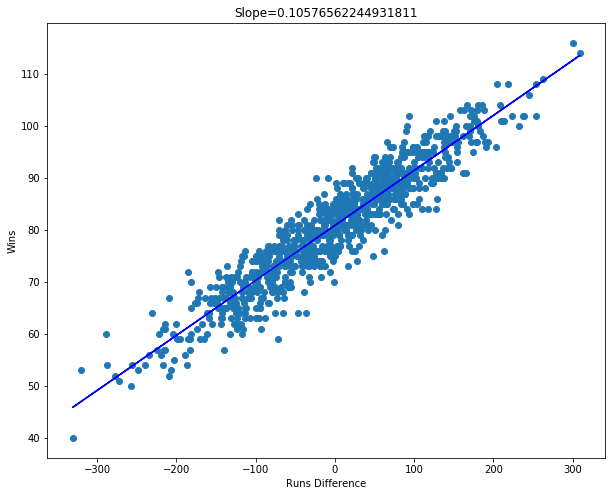

In [96]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)
slope, intercept = np.polyfit(x,y,1)
albine_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,albine_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Runs Difference")
plt.ylabel("Wins")
plt.show()

In [97]:
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


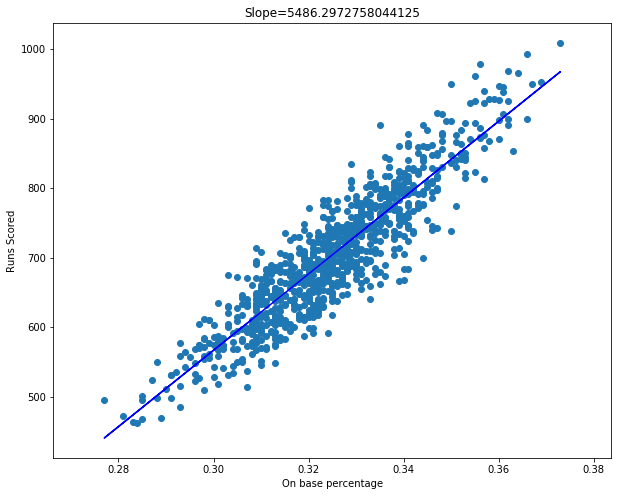

In [98]:
x = np.array(moneyball.OBP)
y = np.array(moneyball.RS)
slope, intercept = np.polyfit(x,y,1)
albine_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,albine_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("On base percentage")
plt.ylabel("Runs Scored")
plt.show()

In [99]:
print(np.corrcoef(moneyball.OBP,moneyball.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


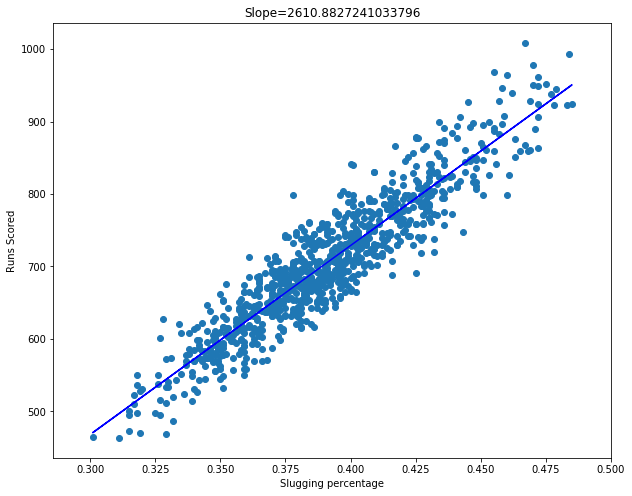

In [100]:
x = np.array(moneyball.SLG)
y = np.array(moneyball.RS)
slope, intercept = np.polyfit(x,y,1)
albine_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,albine_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Slugging percentage")
plt.ylabel("Runs Scored")
plt.show()

In [101]:
print(np.corrcoef(moneyball.SLG,moneyball.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


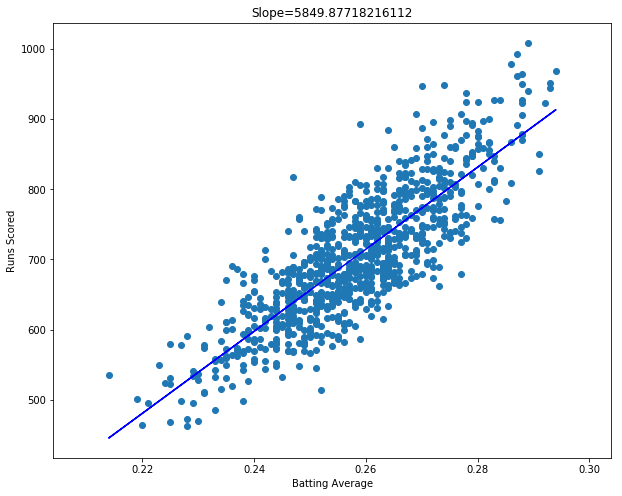

In [102]:
x = np.array(moneyball.BA)
y = np.array(moneyball.RS)
slope, intercept = np.polyfit(x,y,1)
albine_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,albine_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Batting Average")
plt.ylabel("Runs Scored")
plt.show()

In [103]:
print(np.corrcoef(moneyball.BA,moneyball.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


In [104]:
moneyball.isnull().sum()
moneyball.drop(['RankSeason','RankPlayoffs'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
moneyballnew=moneyball.dropna()
moneyballnew.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


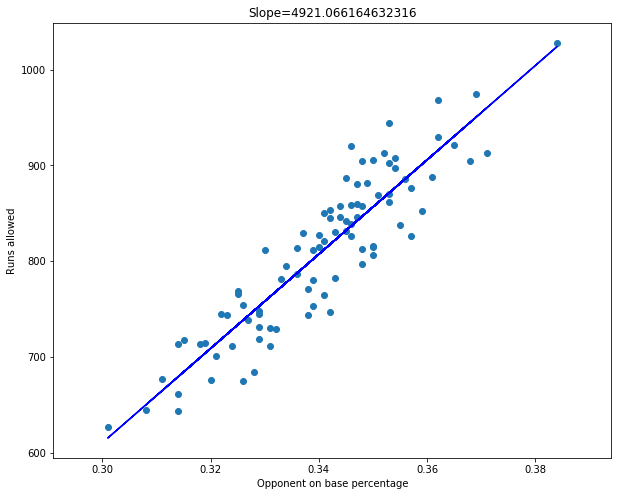

In [106]:
x = np.array(moneyballnew.OOBP)
y = np.array(moneyballnew.RA)
slope, intercept = np.polyfit(x,y,1)
albine_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,albine_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Opponent on base percentage")
plt.ylabel("Runs allowed")
plt.show()

In [107]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[1.         0.90990783]
 [0.90990783 1.        ]]


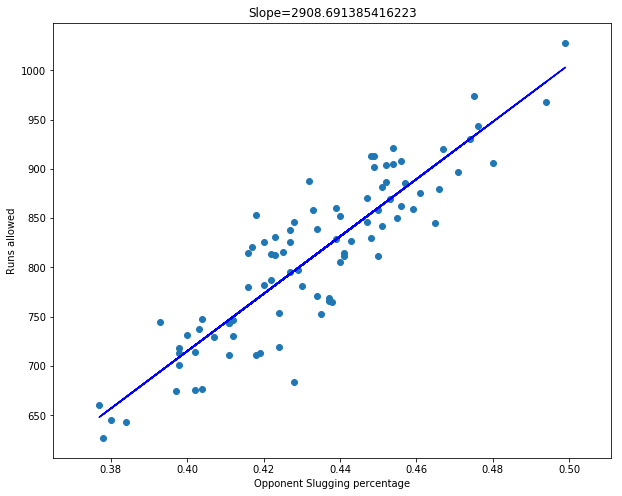

In [108]:
x = np.array(moneyballnew.OSLG)
y = np.array(moneyballnew.RA)
slope, intercept = np.polyfit(x,y,1)
albine_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x,albine_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Opponent Slugging percentage")
plt.ylabel("Runs allowed")
plt.show()

In [109]:
print(np.corrcoef(moneyballnew.OSLG,moneyballnew.RA))

[[1.         0.89511011]
 [0.89511011 1.        ]]


# In ML

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [111]:
x=moneyball[['OBP','SLG','BA']].values
y=moneyball[['RS']].values

In [112]:
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
print('Intercept:',model.intercept_)
print('Coef:',model.coef_)

Intercept: [-788.45704708]
Coef: [[2917.42140821 1637.92766577 -368.96606009]]


In [114]:
x=moneyball[['OBP','SLG']].values
y=moneyball[['RS']].values
RS_model=LinearRegression()
RS_model.fit(x,y)
print('Intercept:',RS_model.intercept_)
print('Coef:',RS_model.coef_)
RS_model.predict([[0.339,0.430]])

Intercept: [-804.62706106]
Coef: [[2737.76802227 1584.90860546]]


array([[804.98699884]])

In [115]:
x=moneyballnew[['OOBP','OSLG']].values
y=moneyballnew[['RA']].values
RA_model=LinearRegression()
RA_model.fit(x,y)
print('Intercept:',RA_model.intercept_)
print('Coef:',RA_model.coef_)
RS_model.predict([[0.339,0.430]])

Intercept: [-837.37788861]
Coef: [[2913.59948582 1514.28595842]]


array([[804.98699884]])

In [116]:
x=moneyball[['RD']].values
y=moneyball[['W']].values
W_model=LinearRegression()
W_model.fit(x,y)
print('Intercept:',W_model.intercept_)
print('Coef:',W_model.coef_)
RS_model.predict([[0.339,0.430]])

Intercept: [80.88137472]
Coef: [[0.10576562]]


array([[804.98699884]])

In [117]:
RA_model.predict([[0.307,0.373]])

array([[621.92581602]])

In [118]:
W_model.predict([[183]])

array([[100.23648363]])

In [119]:
random_seed = 12

In [120]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB())]

In [121]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model, x, y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d arra

LogReg| Mean=0.070940 STD=0.019317


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma

SVM| Mean=0.073175 STD=0.022316
DecTree| Mean=0.073150 STD=0.022728
KNN| Mean=0.076471 STD=0.025945
LinDisc| Mean=0.090940 STD=0.022107


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

GaussianNB| Mean=0.101954 STD=0.027377


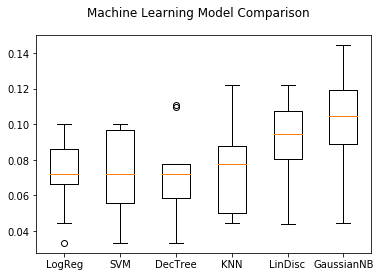

In [122]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()